In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
def get_string_process(neutrino):
    if neutrino == 14:
        return r'$\nu_{\mu} ~N \rightarrow \mu^- X$'
    elif neutrino ==-14:
        return r'$\bar{\nu}_{\mu} N \rightarrow \mu^+ X$'
    elif neutrino ==12:
        return r'$\nu_{e} N \rightarrow e^- X$'
    elif neutrino ==-12:
        return r'$\bar{\nu}_{e} N \rightarrow e^+ X$'
def file_reader(experiment,name,smear_corr='',clipped = 0):   
    x_edges = np.logspace(-4,0,30)
    Q2_edges = np.array([4,10**1,10**2,10**3,10**4,10**5])
    ####################################################
    ####################################################
    #first parse data
    x_lower = np.array([])
    x_upper = np.array([])
    Enu_lower = np.array([])
    Enu_upper = np.array([])
    q2_lower = np.array([])
    q2_upper = np.array([])
    stat_error = np.array([])
    sys_error = np.array([])
    diffxsec = np.array([])
    N = np.array([])
    xavg = np.array([])
    qavg = np.array([])
    Enuavg = np.array([])
    xsec = np.array([])
    frac_variance = np.array([])
    frac_variance_theta = np.array([])
    frac_variance_Elepton = np.array([])
    frac_variance_Ehadron = np.array([])
    MCsamples = np.array([])
    
    if clipped == 0:
        readfile = os.path.join(os.getcwd(),name)
#         print(readfile)
        
        
    with open(readfile,'r') as f:
        lines = f.readlines()
        for il,line in enumerate(lines):
#             
            if il <= 1: 
                continue
            else:
                sp = line.split()
                try:
                    x_lower = np.append(x_lower,float(sp[0]));x_upper = np.append(x_upper,float(sp[1]))
                except:
                    pdb.set_trace()
                xavg = np.append(xavg,float(sp[2]));

                q2_lower = np.append(q2_lower,float(sp[3]));q2_upper = np.append(q2_upper,float(sp[4]))
                qavg = np.append(qavg, float(sp[5]))
                
                Enu_lower = np.append(Enu_lower , float(sp[6]));Enu_upper = np.append(Enu_upper , float(sp[7]))
                Enuavg = np.append(Enuavg , float(sp[8]))
                
                diffxsec = np.append(diffxsec , float(sp[9]))

                N = np.append(N,float(sp[10]))
                stat_error = np.append(stat_error,float(sp[11]))
                sys_error = np.append(sys_error,float(sp[12]))
                frac_variance_theta = np.append(frac_variance_theta , float(sp[13]))
                frac_variance_Elepton = np.append(frac_variance_Elepton , float(sp[14]))
                frac_variance_Ehadron = np.append(frac_variance_Ehadron , float(sp[15]))
                MCsamples = np.append(MCsamples , float(sp[16]))
                
    
#     return x_lower, x_upper, q2_lower,q2_upper,N,stat_error,sys_error
    return x_lower , x_upper , xavg , q2_lower , q2_upper , qavg , Enu_lower , Enu_upper , Enuavg , diffxsec , N , stat_error , sys_error  , frac_variance_theta,frac_variance_Elepton,frac_variance_Ehadron,MCsamples


#make event plots
def make_plots(experiment,neutrino,folder,error):
    #prepare plotting
    csfont = {"size" : 20}
    matplotlib.rc('font', **csfont)
    
    #sets up charm vs inclusive
    save_folder = folder.upper();
    append_save = folder
    
    #selects nu or nubar depending on neutrino type
    neutrino_string = 'nu' if neutrino > 0 else 'nub'
    file = os.path.join(os.getcwd() , save_folder,experiment,'clipped_nan','clipped_nan_binned_sysevents_%s_%s_%s.txt' %(experiment,append_save,neutrino_string))
    
    
    
    #read in data
    x_lower , x_upper , xavg , q2_lower , q2_upper , q2avg , _ , _ , _ , _ , N_array , stat_error , sys_error , frac_sys_theta , frac_sys_Elepton , frac_sys_Ehadron,_ =\
    file_reader(experiment,file)
    
    ####################################
    
    #Prepare figure
    #2x2 subplot with size 32x16. q2_regions correspond to plot_locs in 2x2 array
    fig , AX = plt.subplots(2,2,figsize = (32,16))
    plot_locs = [[0,0],[0,1],[1,0],[1,1]]
    q2_regions = [[4 , 1e1],[10,1e2],[1e2,1e3],[1e3,1e4]]
    
    ####################################
    
    for (iq,q2_region),plot_loc in zip(enumerate(q2_regions),plot_locs):
        #select axis, grab bins that are in that q2_range, x_plot is middle of bin
        ax = AX[plot_loc[0],plot_loc[1]]
        locs = np.where((q2_lower >= q2_region[0]) & (q2_upper<=q2_region[1]))
        x_plot = np.exp((np.log(x_lower[locs[0]])+np.log(x_upper[locs[0]]))/2)
        q2_plot = np.exp((np.log(q2_lower[locs[0]])+np.log(q2_upper[locs[0]]))/2)
        
        #x_ploterr is width of bin
        x_ploterr_lower = x_plot - x_lower[locs[0]]
        x_ploterr_upper = x_upper[locs[0]] - x_plot
        x_ploterr = [x_ploterr_lower,x_ploterr_upper]

        #select type of error
        if error == 'stat':
            y_error = stat_error[locs[0]]
            suptitle = 'Event rate with statistical errors \n '
        elif error =='sys':
            y_error = sys_error[locs[0]]
            suptitle = 'Event rate with systematic errors \n '
        elif error == 'both':
            y_error = np.sqrt(stat_error[locs[0]]**2 +sys_error[locs[0]]**2)
            suptitle = 'Event rate with systematic and statistcal errors \n '
        
        #plot
        ax.errorbar(x_plot , N_array[locs[0]],xerr = x_ploterr,yerr = y_error,linestyle = 'none',color = 'black',capsize = 7)
        
        ####################################
    
        #write text of q2 region, xlabel, ylabel, grid, xlim, title
        ax.text(0.05,0.8,'%1.0f<Q$^2$ GeV$^2$ < %1.0f' %(q2_region[0],q2_region[1]),transform = ax.transAxes)
        ax.set_xlabel('x')
        ax.grid(alpha = 0.7,which = 'both')
        ax.set_xscale('log')
        ax.set_xlim(1e-3,1)
        if neutrino < 0:
            neutrino_string_label = r'\bar{\nu}'
        else:
            neutrino_string_label = r'\nu'
        ax.set_ylabel(r'N$_{%s}$' %neutrino_string_label,fontsize = 30)
        
        #set up title and process
        process = get_string_process(neutrino)
        title = suptitle +experiment + ' : '+ process
        fig.suptitle(title)
        
        
        #Change yscale here and ylim. 
        #You will probably need to change this for other experiments (especially run3 experiments)
        ax.set_yscale('log')
        ax.set_ylim(0.5e2,2e4)

    #save 4 panel plot to pdf
    if not os.path.exists(os.path.join(os.getcwd() , save_folder,'plots')):
        os.mkdir(os.path.join(os.getcwd() , save_folder , 'plots'))
    stringsave = os.path.join(os.getcwd() , save_folder,'plots','Events_%s_%s.pdf' %(experiment,neutrino_string))
    plt.savefig(stringsave)
####################################
####################################


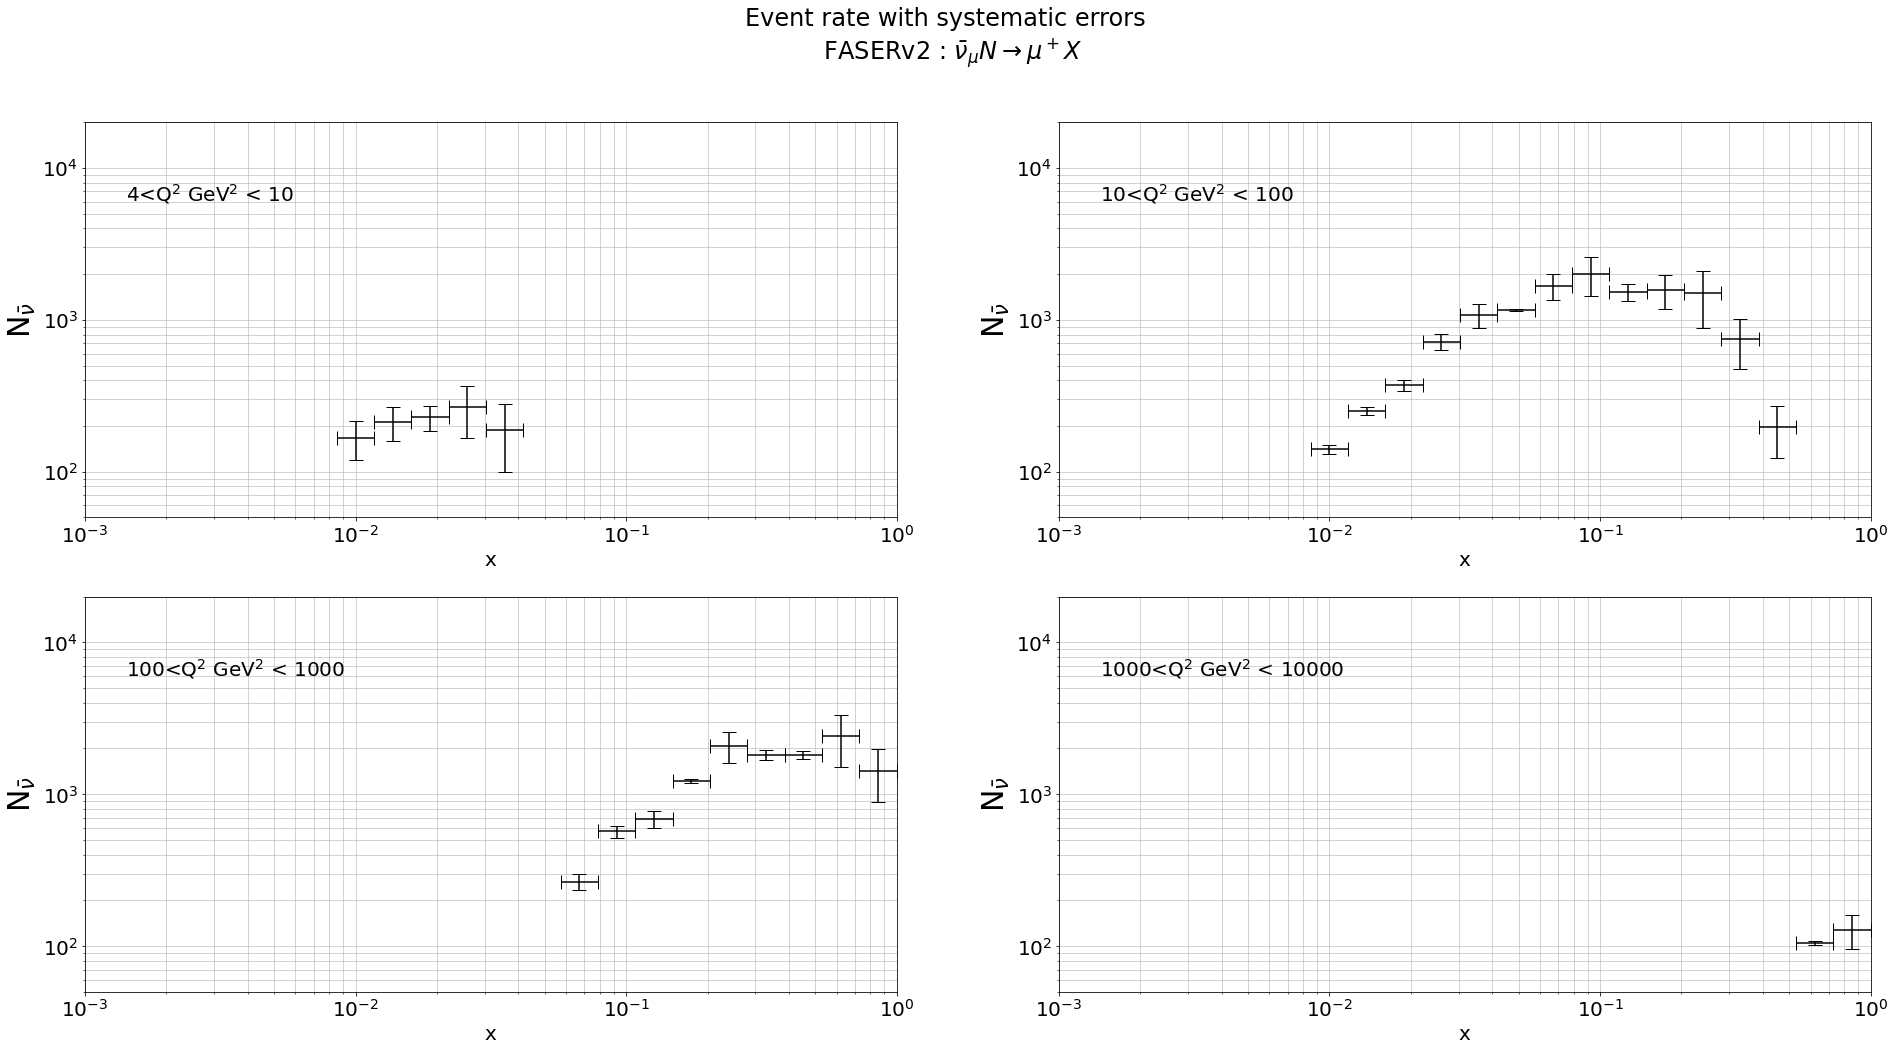

In [17]:
def runplotter():
    #choose some ploting, experiment, neutrino, inclusive/charm, and which errors to plot
    # y limits are currently set at the bottom of make_plots.


    #select experiment {FASERv, FASERv2 , FLArE10 , FLArE100 , SND}
    experiment = 'FASERv2'

    #select neutrino type. This mostly affects the plotting title.The sign of the neutrino selects either nu or nubar of experiment
    #should be either {14,-14} for FASER and SND, and either {12,-12} for FLArE
    neutrino = -14

    #{inclusive , charm}
    processtype = 'inclusive'

    #plot this type of error : {sys , stat , both}, both adds them in quad
    plot_errs = 'sys'

    #plot and save to .../CHARM/plots/...pdf
    make_plots(experiment,neutrino,processtype,plot_errs)
runplotter()